Counts: {'0': 39, '1': 61}
Random Bits: 1110111111111100101010111100111100001101010111111100101011101101011110110111111001110111011000111111


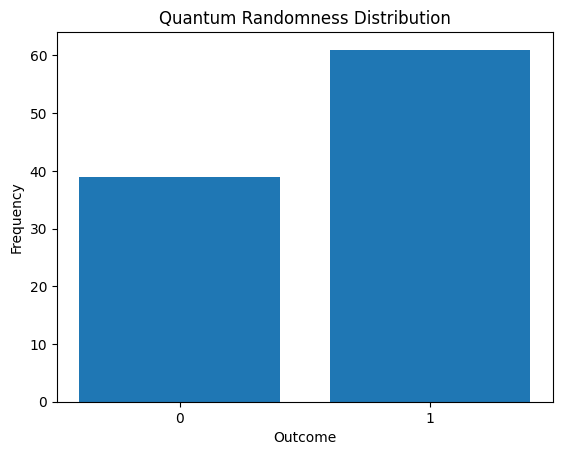

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import matplotlib.pyplot as plt
import numpy as np

# Number of random bits you want
n_bits = 100

# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)

# Apply Hadamard gate to put qubit into superposition
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Run the circuit n_bits times
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=n_bits)
result = job.result()

# Get the measurement counts
counts = result.get_counts()
print("Counts:", counts)

# Generate random bits sequence
bits = []
for _ in range(n_bits):
    outcome = np.random.choice(list(counts.keys()), p=[counts[k]/n_bits for k in counts])
    bits.append(outcome)

print("Random Bits:", ''.join(bits))

# Optional: visualize histogram
plt.bar(counts.keys(), counts.values())
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.title("Quantum Randomness Distribution")
plt.show()
